In [1]:
import socialsim_scoring
import pandas as pd
import glob

## Load Metrics Data

In [2]:
## replace this variable with a list of filepaths for _metrics.json files, e.g. 
filepaths_for_metrics_json_files = glob.glob('./example_teams/*_metrics.json')

In [3]:
df = socialsim_scoring.load_results_from_metrics_files(filepaths_for_metrics_json_files)

Teams represented: ['example_team_1', 'example_team_2']
Scenarios represented: ['1', '2']


## Evaluate Models with Leaderboards and Points Breakdowns

### Scoring evaluates performance per model, averaged over multiple submissions (if multiple submissions exist)

1. Model performance is averaged across all submissions
(e.g. if model_1 has three submissions that achieved RMSE of [0.0, 0.1, 0.2] for 'unique_users_over_time' at the node level for infoID_1, then RMSE for 'unique_users_over_time' at the node level for infoID_1 is 0.1 for model_1)
2. Model performance is averaged across informationIDs for node level measurements and across communities for community level measurements
(e.g. if there are four information IDs simulated and model_1 has RMSE of [0.1,0.1,0.1,0.2] for 'unique_users_over_time' at the node level for the four information IDs, then RMSE for 'unique_users_over_time' at the node level is 0.125 for model_1)
3. Points are awarded based on rank across all models for each metric (e.g. models are assigned points for rmse of node-level density_over_time on Reddit for scenario 1, based on the rank of their rmse from low to high across all models compared) weighted by the proportion of measurements
4. Points for each measurement are assigned based on the mean points awarded to each metric considered for the measurement, weighted by the number of measurements within the four measurement_types (scale of spread, cross-platform spread, social network of spread, structure of spread) where measurements are counted once for each platform (e.g. reddit, twitter) and scale (i.e. node-level, community-level, and population-level). 
5. Scores for each measurement type (scale of spread, cross-platform spread, social network of spread, structure of spread) are calculated by the sum of points awarded to measurements within each category.
6. Total scores are the sum of each measurement-type score.


Points are awarded based on rank across all models under comparison:

**points(rank) = 1 / (1+rank)**


If two models perform equally, both are awarded the points value for the shared rank. 

e.g. if model 1 and model 2 are both ranked #1, then both are awarded 1 point. **Therefore, scores across models may not sum to 1.**

### Leaderboard that includes all models ranked against each other

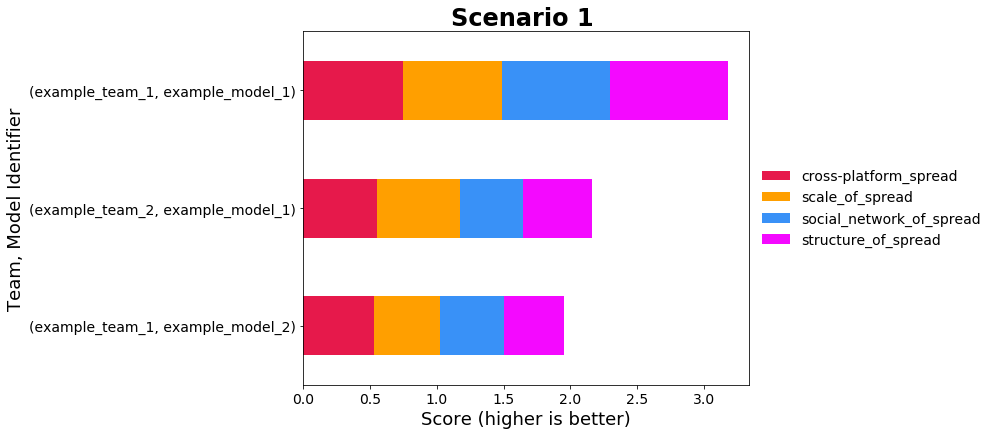

In [5]:
scenario = '1' 
## socialsim_scoring.show_leaderboard_from_metrics_jsons will display the leaderboard
socialsim_scoring.show_leaderboard_from_metrics(df, scenario)

**socialsim_scoring.leaderboard_table_from_metrics_jsons** will return the pandas dataframe behind the leaderboard

In [6]:
## socialsim_scoring.leaderboard_table_from_metrics_jsons will return the pandas dataframe behind the leaderboard
leaderboard = socialsim_scoring.leaderboard_table_from_metrics(df, scenario=scenario)
display(leaderboard)

,measurement_type,cross-platform_spread,scale_of_spread,social_network_of_spread,structure_of_spread,total
team,identifier,,,,,
example_team_1,example_model_1,0.750000,0.741806,0.805952,0.882812,3.180570
example_team_2,example_model_1,0.553030,0.621806,0.473810,0.515625,2.164270
example_team_1,example_model_2,0.530303,0.491389,0.482143,0.450521,1.954356


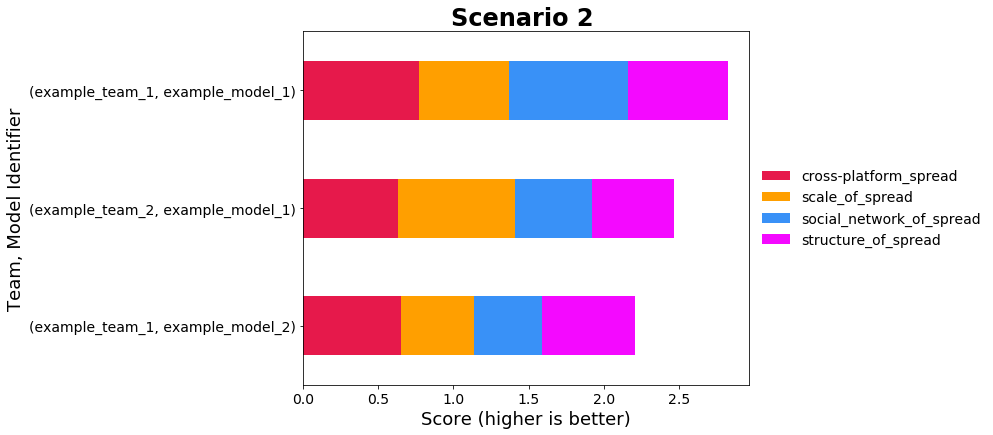

In [7]:
scenario = '2' 
## socialsim_scoring.show_leaderboard_from_metrics_jsons will display the leaderboard
socialsim_scoring.show_leaderboard_from_metrics(df, scenario)

**socialsim_scoring.leaderboard_table_from_metrics_jsons** will return the pandas dataframe behind the leaderboard

In [8]:
leaderboard = socialsim_scoring.leaderboard_table_from_metrics(df, scenario=scenario)
display(leaderboard)

,measurement_type,cross-platform_spread,scale_of_spread,social_network_of_spread,structure_of_spread,total
team,identifier,,,,,
example_team_1,example_model_1,0.773438,0.595584,0.792929,0.664931,2.826881
example_team_2,example_model_1,0.632812,0.776353,0.511364,0.548611,2.469141
example_team_1,example_model_2,0.651042,0.482764,0.453283,0.619792,2.206880


### Leaderboard that only includes the best model for each team 

Passing **only_show_best_models=True** to the **socialsim_scoring.show_leaderboard_from_metrics_jsons** function will only show the best model for each team in the leaderboard

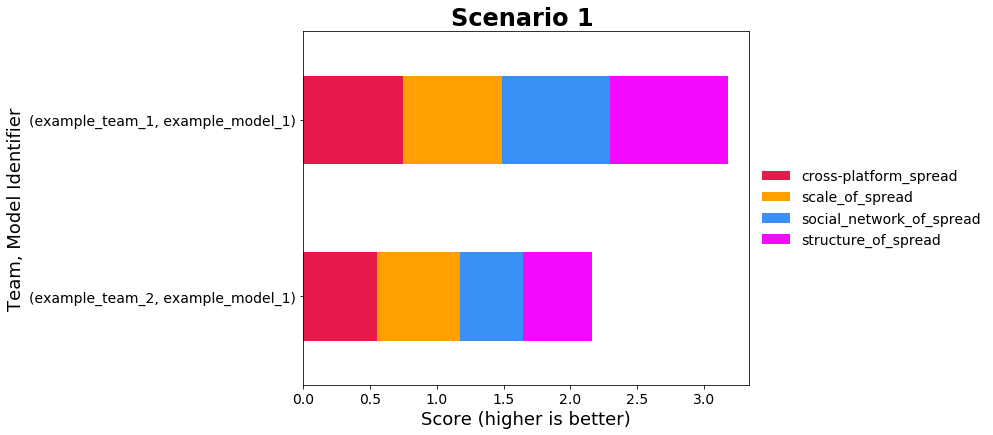

In [9]:
scenario = '1' 
## socialsim_scoring.show_leaderboard_from_metrics_jsons will display the leaderboard
socialsim_scoring.show_leaderboard_from_metrics(df, scenario, only_show_best_models=True)

**socialsim_scoring.best_models_leaderboard_table_from_metrics_jsons** will return the pandas dataframe behind the leaderboard when only displaying the best models

In [10]:
## socialsim_scoring.leaderboard_table_from_metrics_jsons will return the pandas dataframe behind the leaderboard
leaderboard = socialsim_scoring.best_models_leaderboard_table_from_metrics(df, scenario=scenario)
display(leaderboard)

,measurement_type,cross-platform_spread,scale_of_spread,social_network_of_spread,structure_of_spread,total
team,identifier,,,,,
example_team_1,example_model_1,0.75000,0.741806,0.805952,0.882812,3.18057
example_team_2,example_model_1,0.55303,0.621806,0.473810,0.515625,2.16427


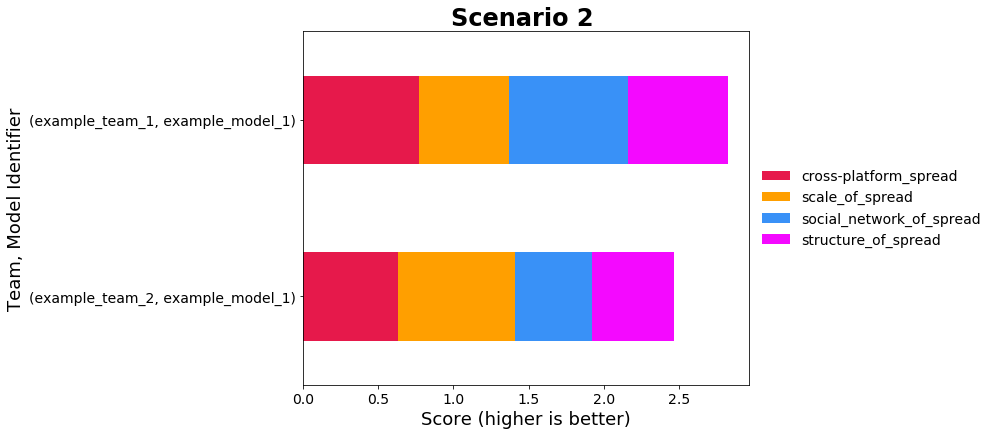

In [11]:
scenario = '2' 
## socialsim_scoring.show_leaderboard_from_metrics_jsons will display the leaderboard
socialsim_scoring.show_leaderboard_from_metrics(df, scenario, only_show_best_models=True)

**socialsim_scoring.best_models_leaderboard_table_from_metrics_jsons** will return the pandas dataframe behind the leaderboard when only displaying the best models

In [12]:
leaderboard = socialsim_scoring.best_models_leaderboard_table_from_metrics(df, scenario=scenario)
display(leaderboard)

,measurement_type,cross-platform_spread,scale_of_spread,social_network_of_spread,structure_of_spread,total
team,identifier,,,,,
example_team_1,example_model_1,0.773438,0.595584,0.792929,0.664931,2.826881
example_team_2,example_model_1,0.632812,0.776353,0.511364,0.548611,2.469141


## Examine model performance using the percentage of possible points awarded within different groupings of measurements

In [13]:
breakdown_s1 = socialsim_scoring.percentage_possible_points_awarded_breakdown(df,scenario='1')
breakdown_s2 = socialsim_scoring.percentage_possible_points_awarded_breakdown(df,scenario='2')

You can examine performance at three levels of groupings: 
    - 'individual_measurements'
    - 'scale_temporal_groups'
    - 'measurement_type'

## Breakdown by Measurement 
Percentage (from 0 to 100) of possible points awarded to each model for each measurement 

In [14]:
breakdown_s1['individual_measurements'].round(2)

team                                                                                                         example_team_1  \
identifier                                                                                                  example_model_1   
scenario measurement_type      platform       scale      temporal measurement                                                 
1        cross-platform_spread multi_platform node       Batch    lifetime_of_spread                                 100.00   
                                                                  order_of_spread                                    100.00   
                                                                  overlapping_users                                   33.33   
                                                                  size_of_audience                                   100.00   
                                                                  size_of_shares                                     100.00   
...                                                                                                                     ...   
         structure_of_spread   multi_platform population Batch    distribution_of_burst_platform_proportion           87.50   
                                                                  distribution_of_burst_timing_burstiness            100.00   
                                                                  distribution_of_new_users_per_burst                 87.50   
                                                                  distribution_of_number_of_bursts                    83.33   
                                                                  distribution_of_time_between_bursts                 87.50   

team                                                                                                                         \
identifier                                                                                                  example_model_2   
scenario measurement_type      platform       scale      temporal measurement                                                 
1        cross-platform_spread multi_platform node       Batch    lifetime_of_spread                                  33.33   
                                                                  order_of_spread                                     33.33   
                                                                  overlapping_users                                   50.00   
                                                                  size_of_audience                                    33.33   
                                                                  size_of_shares                                      50.00   
...                                                                                                                     ...   
         structure_of_spread   multi_platform population Batch    distribution_of_burst_platform_proportion           41.67   
                                                                  distribution_of_burst_timing_burstiness             37.50   
                                                                  distribution_of_new_users_per_burst                 54.17   
                                                                  distribution_of_number_of_bursts                    54.17   
                                                                  distribution_of_time_between_bursts                 33.33   

team                                                                                                         example_team_2  
identifier                                                                                                  example_model_1  
scenario measurement_type      platform       scale      temporal measurement                                                
1        cross-platform_spread multi_platform node       Batch  

In [15]:
breakdown_s2['individual_measurements'].round(2)

team                                                                                                         example_team_1  \
identifier                                                                                                  example_model_1   
scenario measurement_type      platform       scale      temporal measurement                                                 
2        cross-platform_spread multi_platform community  Batch    correlation_of_audiences                            33.33   
                                                                  correlation_of_lifetimes                           100.00   
                                                                  correlation_of_shares                               41.67   
                                                                  correlation_of_speeds                               41.67   
                                                                  lifetime_of_spread                                 100.00   
...                                                                                                                     ...   
         structure_of_spread   multi_platform population Batch    distribution_of_burst_platform_proportion           45.83   
                                                                  distribution_of_burst_timing_burstiness             70.83   
                                                                  distribution_of_new_users_per_burst                 66.67   
                                                                  distribution_of_number_of_bursts                   100.00   
                                                                  distribution_of_time_between_bursts                 62.50   

team                                                                                                                         \
identifier                                                                                                  example_model_2   
scenario measurement_type      platform       scale      temporal measurement                                                 
2        cross-platform_spread multi_platform community  Batch    correlation_of_audiences                            50.00   
                                                                  correlation_of_lifetimes                            33.33   
                                                                  correlation_of_shares                               41.67   
                                                                  correlation_of_speeds                               41.67   
                                                                  lifetime_of_spread                                  50.00   
...                                                                                                                     ...   
         structure_of_spread   multi_platform population Batch    distribution_of_burst_platform_proportion           83.33   
                                                                  distribution_of_burst_timing_burstiness             75.00   
                                                                  distribution_of_new_users_per_burst                 75.00   
                                                                  distribution_of_number_of_bursts                    33.33   
                                                                  distribution_of_time_between_bursts                 33.33   

team                                                                                                         example_team_2  
identifier                                                                                                  example_model_1  
scenario measurement_type      platform       scale      temporal measurement                                                
2        cross-platform_spread multi_platform community  Batch  

## Breakdown by Scale and Temporal/Batch within Measurement Types
Percentage (from 0 to 100) of possible points awarded to each model for each set of measurements when grouped by the group scale ("scale") and whether temporal vs batch ("temporal") within each measurement type

In [16]:
breakdown_s1['scale_temporal_groups'].round(2)

team                                                   example_team_1  \
identifier                                            example_model_1   
scenario measurement_type         scale      temporal                   
1        cross-platform_spread    node       Batch              90.48   
                                             Temporal           33.33   
                                  population Batch              68.18   
                                             Temporal          100.00   
         scale_of_spread          node       Batch              70.33   
                                             Temporal           63.33   
                                  population Batch              79.38   
                                             Temporal           68.89   
         social_network_of_spread node       Batch             100.00   
                                             Temporal           78.27   
                                  population Batch              79.17   
                                             Temporal          100.00   
         structure_of_spread      node       Batch              83.33   
                                  population Batch              93.23   

team                                                                   \
identifier                                            example_model_2   
scenario measurement_type         scale      temporal                   
1        cross-platform_spread    node       Batch              40.48   
                                             Temporal           75.00   
                                  population Batch              60.61   
                                             Temporal           33.33   
         scale_of_spread          node       Batch              47.00   
                                             Temporal           42.22   
                                  population Batch              53.03   
                                             Temporal           42.78   
         social_network_of_spread node       Batch              39.58   
                                             Temporal           41.37   
                                  population Batch              55.32   
                                             Temporal           33.33   
         structure_of_spread      node       Batch              45.83   
                                  population Batch              44.27   

team                                                   example_team_2  
identifier                                            example_model_1  
scenario measurement_type         scale      temporal                  
1        cross-platform_spread    node       Batch              52.38  
                                             Temporal           75.00  
                                  population Batch              54.55  
                                             Temporal           50.00  
         scale_of_spread          node       Batch              66.00  
                                             Temporal           77.78  
                                  population Batch              54.92  
                                             Temporal           71.67  
         social_network_of_spread node       Batch              43.75  
                                             Temporal           45.83  
                                  population Batch              48.84  
                                             Temporal           50.00  
         structure_of_spread      node       Batch              54.17  
                                  population Batch              48.96

In [17]:
breakdown_s2['scale_temporal_groups'].round(2)

team                                                   example_team_1  \
identifier                                            example_model_1   
scenario measurement_type         scale      temporal                   
2        cross-platform_spread    community  Batch              76.67   
                                  node       Batch              83.33   
                                             Temporal           62.50   
                                  population Batch              72.73   
                                             Temporal          100.00   
         scale_of_spread          community  Batch              54.63   
                                             Temporal           69.44   
                                  node       Batch              55.56   
                                             Temporal           75.93   
                                  population Batch              57.09   
                                             Temporal           70.37   
         social_network_of_spread community  Batch              54.17   
                                             Temporal          100.00   
                                  node       Batch              93.75   
                                             Temporal           73.81   
                                  population Batch              85.90   
                                             Temporal           70.83   
         structure_of_spread      community  Batch              62.50   
                                  node       Batch              64.58   
                                  population Batch              72.40   

team                                                                   \
identifier                                            example_model_2   
scenario measurement_type         scale      temporal                   
2        cross-platform_spread    community  Batch              56.67   
                                  node       Batch              85.71   
                                             Temporal           87.50   
                                  population Batch              58.33   
                                             Temporal           50.00   
         scale_of_spread          community  Batch              54.17   
                                             Temporal           37.04   
                                  node       Batch              44.44   
                                             Temporal           35.19   
                                  population Batch              52.74   
                                             Temporal           36.11   
         social_network_of_spread community  Batch              66.67   
                                             Temporal           37.50   
                                  node       Batch              45.83   
                                             Temporal           38.69   
                                  population Batch              48.08   
                                             Temporal           66.67   
         structure_of_spread      community  Batch              68.75   
                                  node       Batch              56.25   
                                  population Batch              60.94   

team                                                   example_team_2  
identifier                                            example_model_1  
scenario measurement_type         scale      temporal                  
2        cross-platform_spread    community  Batch              66.67  
                                  node       Batch              66.67  
                                             Temporal           33.33  
                                  population Batch              68.94  
                                             Temporal           33.33  
         scale_of_spread          community  Batch              

## Breakdown by Measurement Type
Percentage (from 0 to 100) of possible points awarded to each model for each set of measurements when grouped by the  measurement type

In [18]:
breakdown_s1['measurement_type'].round(2)

team                               example_team_1                  \
identifier                        example_model_1 example_model_2   
scenario measurement_type                                           
1        cross-platform_spread              75.00           53.03   
         scale_of_spread                    74.18           49.14   
         social_network_of_spread           80.60           48.21   
         structure_of_spread                88.28           45.05   

team                               example_team_2  
identifier                        example_model_1  
scenario measurement_type                          
1        cross-platform_spread              55.30  
         scale_of_spread                    62.18  
         social_network_of_spread           47.38  
         structure_of_spread                51.56

In [19]:
breakdown_s2['measurement_type'].round(2)

team                               example_team_1                  \
identifier                        example_model_1 example_model_2   
scenario measurement_type                                           
2        cross-platform_spread              77.34           65.10   
         scale_of_spread                    59.56           48.28   
         social_network_of_spread           79.29           45.33   
         structure_of_spread                66.49           61.98   

team                               example_team_2  
identifier                        example_model_1  
scenario measurement_type                          
2        cross-platform_spread              63.28  
         scale_of_spread                    77.64  
         social_network_of_spread           51.14  
         structure_of_spread                54.86